# Data Structures Course 
# 1-2 Linked List Sequences

Shiraz University Fall 2024    
Reza Rezazadegan   
www.dreamintelligent.com 

 

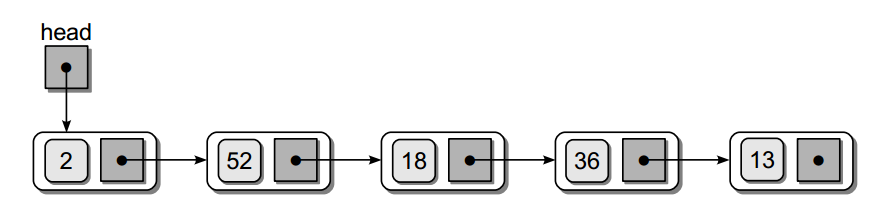

### Advantages of linked lists to lists: O(1) deletion and insertion (at the current node)
### Disadvantages: no random access
Random access in lists using index is done in O(1)

Linked lists can be singly or doubly linked and/or circular.  

Tail node has a null link. We may keep a pointer to the tail node for faster access to the end of the list.

Linked lists are not provided by the standard library of Python.

More complex linked structures such as graphs:
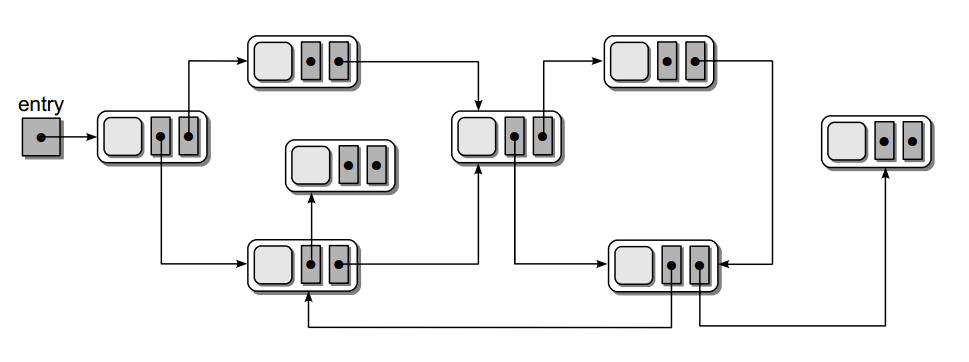


In [ ]:
class Linked_List_Node:
    def __init__(self, x): # O(1)
        self.item = x
        self.next = None
    
    # For traversing the linked list
    #def later_node(self, i): # O(i)
    #    if i == 0: return self
    #    assert self.next
    #    return self.next.later_node(i - 1)

In [ ]:
class Linked_List:
    def __init__(self):
        self.head = None
        self.size = 0

    def __len__(self): return self.size

    # Retuns the i'th node in the linked list 
    def later_node(self, i):
        node=self.head
        for k in range(i):
            if node.next!=None:
                node=node.next

        return node        


    def __iter__(self):
        node = self.head
        while node:
            yield node.item
            node = node.next

    
    def get_at(self, i):
        assert i<=self.size, "Index out of range"
        node = self.later_node(i)
        return node.item


    def set_at(self, i, x): # O(i)
        assert i<=self.size, "Index out of range"

        node = self.later_node(i)
        node.item = x

    def insert_first(self, x): # O(1)
        new_node = Linked_List_Node(x)
        new_node.next = self.head
        self.head = new_node
        self.size += 1

    def build(self, X):
        for a in reversed(X):
            self.insert_first(a)    

    def delete_first(self): # O(1)
        old_head= self.head
        x = self.head.item
        self.head = self.head.next
        self.size -= 1
        
        del old_head
        return x

    def insert_at(self, i, x): # O(i)
        if i == 0:
            self.insert_first(x)
            return
        new_node = Linked_List_Node(x)
        node = self.later_node(i - 1)
        new_node.next = node.next
        node.next = new_node
        self.size += 1

    def delete_at(self, i): # O(i)
        if i == 0:
            return self.delete_first()
        node = self.later_node(i - 1)
        removed_node= node.next
        x = node.next.item
        node.next = node.next.next
        self.size -= 1
        del removed_node
        return x
        # O(n)

        
    def insert_last(self, x): self.insert_at(len(self), x)
    def delete_last(self): return self.delete_at(len(self) - 1)


### `insert_first` (prepend)
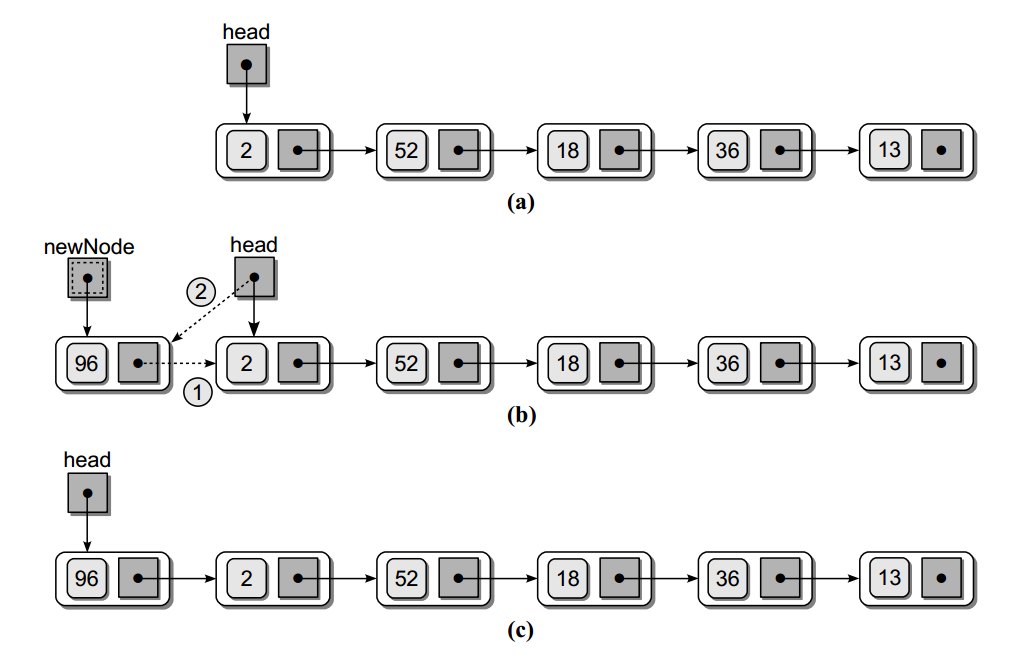

## Removing nodes
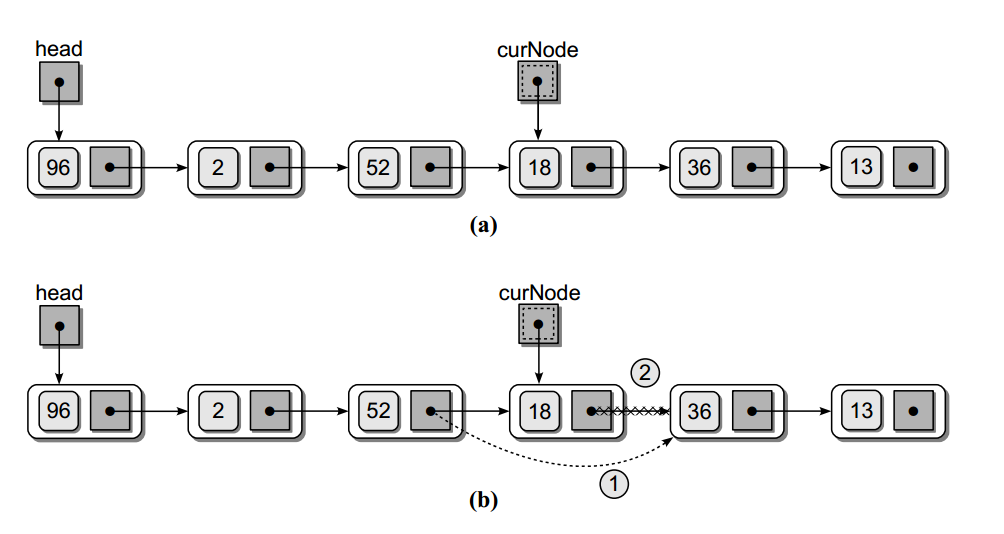

### Keping track of the previous element:
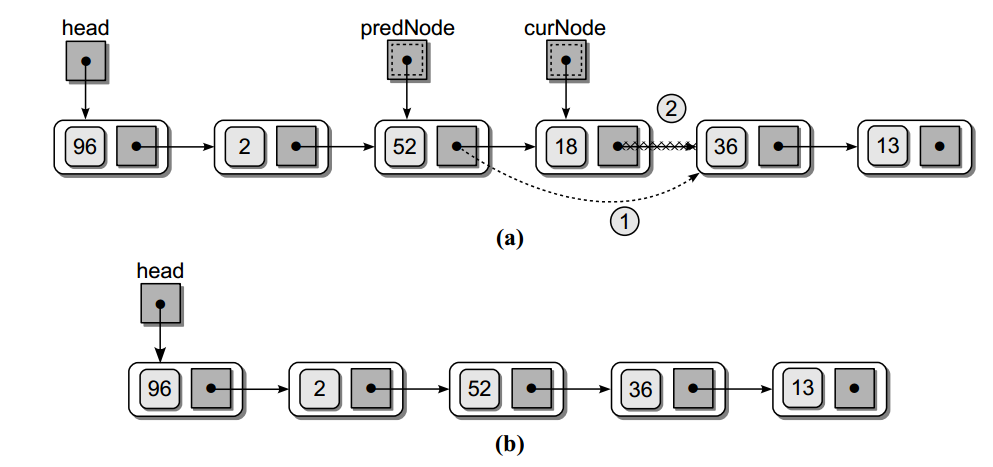

## `delete_first()`
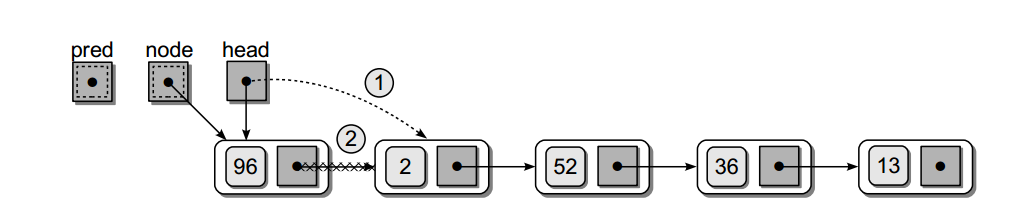

## `insert_at`
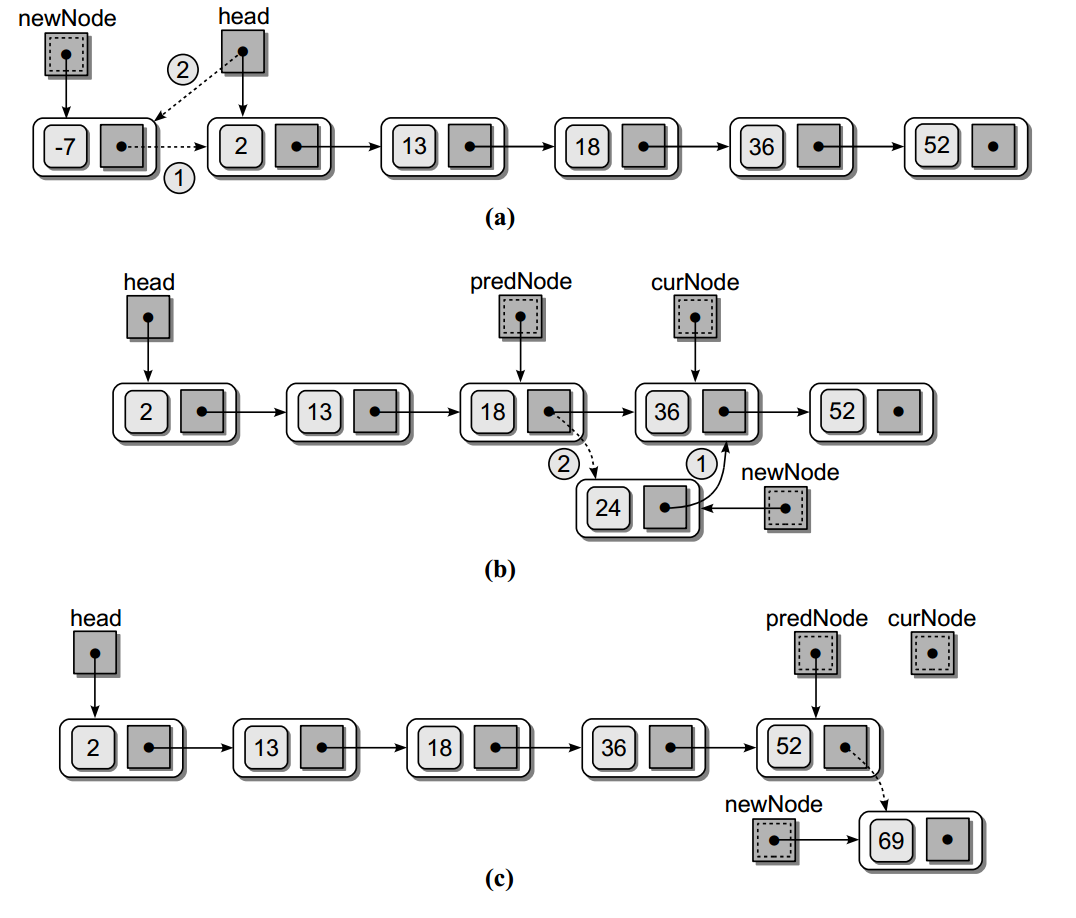

In [1]:
# Searching for a node by value
def unorderedSearch( head, target ):
     curNode = head
     while curNode is not None and curNode.data != target :
         curNode= curNode.next
         
     return curNode is not None

# Implementing sparse matrices using linked lists

In the last chapter, we implemented sparse matrices as a 1-D array of its nonzero elements. Here we construct an alternative implementation using linked list. Each row of the sparse matrix is going to be represented by a linked list, *sorted by column number*. We then use an array (the vertical one in the picture below) to keep track of these rows. 


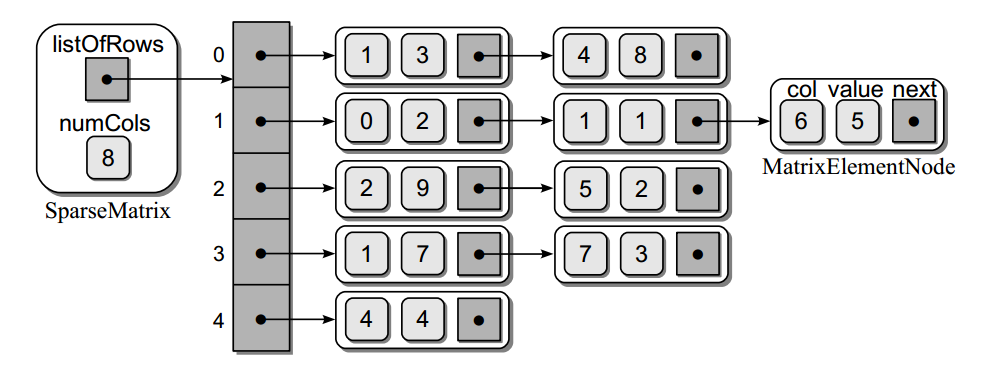

As an exercise, write down the matrix associated with the above figure.

In [1]:
# Storage class for creating matrix element nodes.
from Array import Array
class _MatrixElementNode :
     def __init__( self, col, value ) :
         self.col = col
         self.value = value
         self.next = None

# Implementation of the Sparse Matrix ADT using an array of linked lists.
from array import *
class SparseMatrix :
    # Creates a sparse matrix of size numRows x numCols initialized to 0.
    def __init__( self, numRows, numCols ):
        self._numCols = numCols
        self._listOfRows = Array( numRows ) # The same array class we defined in the last lecture 

    # Returns the number of rows in the matrix.
    def numRows( self ):
        return len( self._listOfRows )

    # Returns the number of columns in the matrix.
    def numCols( self ):
        return self._numCols

    # Returns the value of element (i,j): x[i,j]
    def __getitem__( self, ndxTuple ):
        i,j=ndxTuple
        assert i>=0 and j>=0 and i<self.numRows() and j<self.numCols(), "Index out of range."

        row_head=self._listOfRows[i]
        curNode=row_head
        while(curNode!=None and curNode.col<j):
            curNode=curNode.next

        if curNode!=None and curNode.col==j:
            return curNode.value
        else:
            return 0    

   

    # Sets the value of element (i,j) to the value s: x[i,j] = s
    def __setitem__( self, ndxTuple, value ):
        
        row, col=ndxTuple
        assert row>=0 and col>=0 and row<self.numRows() and col<self.numCols(), "Index out of range."

        predNode = None
        #_listOfRows[row] is the head of the linked list for the row
        curNode = self._listOfRows[row]
        while curNode is not None and curNode.col < col :
            predNode = curNode
            curNode = curNode.next

        # See if the element is in the list.
        if curNode is not None and curNode.col == col :
            if value == 0.0 : # remove the node.
                if curNode == self._listOfRows[row] :
                    self._listOfRows[row] = curNode.next
                else :
                    predNode.next = curNode.next
            else : # change the node's value.
                curNode.value = value

        # Otherwise, the element is not in the list.
        elif value != 0.0 :
            newNode = _MatrixElementNode( col, value )
            newNode.next == curNode
            if curNode == self._listOfRows[row] :
                self._listOfRows[row] = newNode
            else :
                predNode.next = newNode

    # Scales the matrix by the given scalar.
    def scaleBy( self, scalar ):
        if scalar==0:
            for row in range( self.numRows() ):
                self._listOfRows[row]=None

        for row in range( self.numRows() ) :
            curNode = self._listOfRows[row]
            while curNode is not None :
                curNode.value *= scalar
                curNode = curNode.next

    # Creates and returns a new matrix that is the transpose of this matrix.
    def transpose( self ):

        newmatrix=SparseMatrix(self.numCols(), self.numRows())
        for i in range(self.numRows()):
            #for j in range(self.numCols()):
            #    newmatrix[j,i]=self[i,j]
            curnode=self._listOfRows[i]
            while(curnode!=None):
                newmatrix[curnode.col, i]=curnode.value
                curnode=curnode.next

        return newmatrix   


    def remove_first_col(self):
        A=SparseMatrix()
        A._numCols=self._numCols-1
        for head in self._listOfRows:

            # Removing the elements belonging to the first (actually zero'th) column 
            if head.col==0:  
                A._listOfRows.insert_last(head.next)
            else:
                A._listOfRows.insert_last(head)

        return A  

    def remove_row(self, k):
        newM=SparseMatrix()
        newM._numCols=self._numCols

        newM._listOfRows=self._listOfRows.copy()
        newM._listOfRows.delete_at(k)

        return newM
    
     






    # Matrix addition: newMatrix = self + rhsMatrix.
    def __add__( self, rhsMartrix ) :
        # Make sure the two matrices have the correct size.
        assert rhsMatrix.numRows() == self.numRows() and \
        rhsMatrix.numCols() == self.numCols(), \
        "Matrix sizes not compatable for adding."

        # Create a new sparse matrix of the same size.
        newMatrix = SparseMatrix( self.numRows(), self.numCols() )

        # Add the elements of this matrix to the new matrix.
        for row in range( self.numRows() ) :
            curNode = self._listOfRows[row]
            while curNode is not None :
                newMatrix[row, curNode.col] = curNode.value
                curNode = curNode.next

        # Add the elements of the rhsMatrix to the new matrix.
        for row in range( rhsMatrix.numRows() ) :
            curNode = rhsMatrix._listOfRows[row]
            while curNode is not None :
                #value = newMatrix[row, curNode.col]
                #value += curNode.value
                newMatrix[row, curNode.col] = curNode.value+ self[row, curNode.col]  # value
                curNode = curNode.next

        # Return the new matrix.
        return newMatrix

    # multiplication ---
    # 
    def __mul__( self, rhsMatrix ) :
        assert self.numCols()==rhsMatrix.numRows(), "Matrices can't be multiplied."

        M=SparseMatrix(self.numRows(), rhsMatrix.numCols())

        for i in range(len(self._listOfRows)):
            curNode=self._listOfRows[i]
            while curNode!=None:
                k=curNode.col
                #Must find nonzero elements of rhsMatrix whose row equals k
                rhsNode=rhsMatrix._listOfRows[k]
                while rhsNode!=None:
                    j=rhsNode.col
                    M[i,j]=M[i,j]+curNode.value*rhsNode.value # must be added to the i,j entry of the product matrix
                    rhsNode=rhsNode.next
                curNode=curNode.next  

    # removes the row and col=0 from the matrix
    def remove(self, row):
        newmatrix=SparseMatrix(self.numRows()-1, self.numCols()-1  )
        newmatrix._listOfRows=self._listOfRows.copy()
        #removing the row
        newmatrix._listOfRows.pop(row)

        #removing column 0
        for i,head in enumerate(newmatrix._listOfRows):
            if head.col==0:
                newmatrix._listOfRows[i]=head.next
            curr=newmatrix._listOfRows[i]
            while curr!=None:
                curr.col-=1
                curr=curr.next    

        return newmatrix        






## Comparison of implementations for sparse matrices
Assuming that $n$ is the number of columns of the matrix and it has $k$ nonzero elements. See excercises 11 and 12. The array of linked lists version will typically provide better times since the efficiency for many of the operations is based on the number of columns in the
matrix and not the total number of non-zero elements.
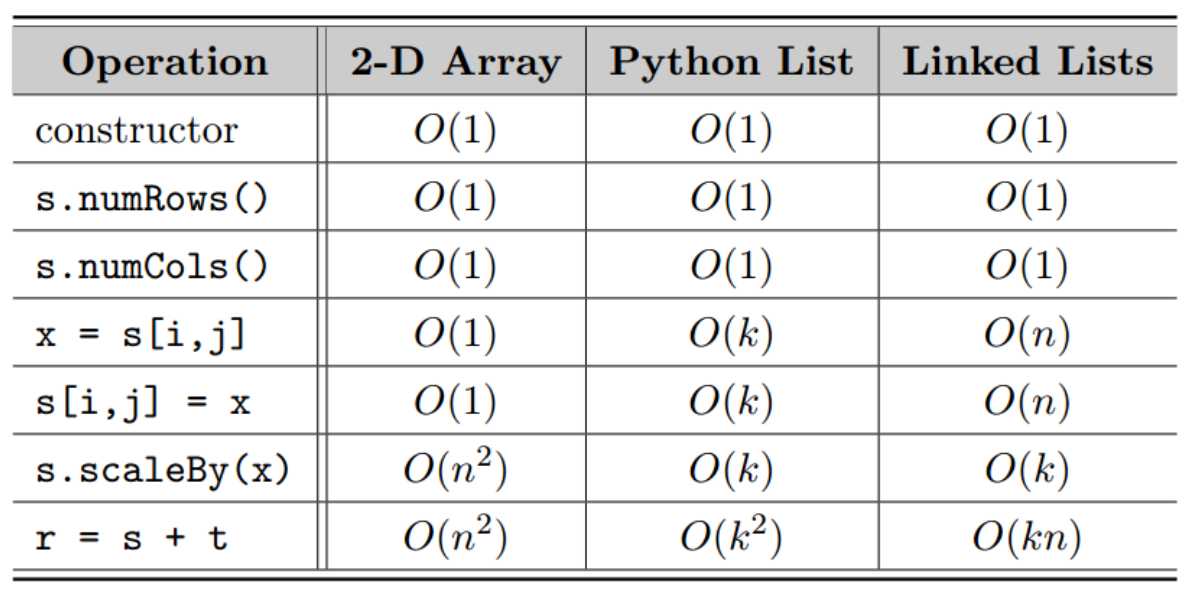

# Polynomials

Polynomials are functions of the form 
$$P(x)=a_0+a_1 x+ a_2x^2+a_3 x^3+\cdots+ a_n x^n.$$
Each one of the summands in the above sum is called a _monomial_.
The largest $n$ such that $a_n\neq 0$ is called the degree of $P(x)$. (Note that the degree of the zero polynomial is not zero but $-\infty$. This is because the maximum of the empty set is negative infinity!)
Polynomials can be added, multiplied, and also evaluated for particular values of $x$. We want a data structure that can encode polynomials and provide these operations. Since some of the coefficients $a_i$ may be zero, polynomials are similar to sparse vectors and thus, we implement them by linked lists, whose nodes are sorted by degree, in reverse. 

For example, the polynomial $1+3x^2+5x^{10}$ is encoded as
$$(10,5)\to (2,3)\to (0,1) $$

In [22]:
# Implementation of the Polynomial ADT using a sorted linked list.

# Class for creating polynomial term (aka monomial) nodes used with the linked list.
class _PolyTermNode( object ):
    def __init__( self, degree, coefficient ):
        self.i = degree
        self.a = coefficient
        self.next = None

class Polynomial :
    # Create a new polynomial object with just one monomial.
    def __init__(self, degree = None, coefficient = None):
        if degree is None :
            self._polyHead = None
        else :
            self._polyHead = _PolyTermNode(degree, coefficient)
            self._polyTail = self._polyHead

    # Return the degree of the polynomial.
    def degree( self ):
        if self._polyHead is None :
            return -1 #Since we don't have negative infinity here!
        else :
            return self._polyHead.i

    # Return the coefficient for the term of the given degree.
    def __getitem__( self, degree ):
        assert self.degree() >= 0, "Operation not permitted on an empty polynomial."
        
        curNode = self._polyHead
        while curNode is not None and curNode.i >= degree :
            curNode = curNode.next

        if curNode is None or curNode.i != degree :
            return 0.0
        else :
            return curNode.a

    # Evaluate the polynomial at the given scalar value.
    def evaluate( self, scalar ):
        assert self.degree() >= 0, "Only non-empty polynomials can be evaluated."
        result = 0.0
        curNode = self._polyHead
        while curNode is not None :
            result += curNode.a * (scalar ** curNode.i)
            curNode = curNode.next
        return result

    

    # Helper method for appending terms to the polynomial.
    def _appendTerm( self, degree, coefficient ) :
        if coefficient != 0.0 :
            newTerm = _PolyTermNode( degree, coefficient )
            if self._polyHead is None :
                self._polyHead = newTerm
            else :
                self._polyTail.next = newTerm
            self._polyTail = newTerm



In [10]:
class Polynomial :
    
    def __add__( self, rhsPoly ):
        assert self.degree() >= 0 and rhsPoly.degree() >= 0,  "Addition only allowed on non-empty polynomials." 

        newPoly = Polynomial()
        nodeA = self._termList
        nodeB = rhsPoly._termList

        # Add corresponding terms until one list is empty.
        while nodeA is not None and nodeB is not None :
            if nodeA.i > nodeB.i :
                degree = nodeA.i
                value = nodeA.a
                nodeA = nodeA.next
            elif nodeA.i < listB.i :
                degree = nodeB.i
                value = nodeB.a
                nodeB = nodeB.next
            else :
                degree = nodeA.i
                value = nodeA.a + nodeB.a
                nodeA = nodeA.next
                nodeB = nodeB.next
            newPoly._appendTerm( degree, value )

        # If self list contains more terms append them.
        while nodeA is not None :
            newPoly._appendTerm( nodeA.i, nodeA.a )
            nodeA = nodeA.next

        # Or if rhs contains more terms append them.
        while nodeB is not None :
            newPoly._appendTerm( nodeB.i, nodeB.a )
            nodeB = nodeB.next

        return newPoly


# Exercises

1- Implement a function for inserting a new node into a sorted linked list (i.e. a linked list in which the value of the next node is always greater than or equal to the value of the current node).

2- Imagine the last node of a linked list points to another node in the list, creating a loop. How can the length of this loop be computed, using only $O(1)$ extra memory.

3- Write a function for deleting a node in a linked list, by value.


4- Imagine a data type consisting of linked static arrays of a fixed size $N$. In such a structure, when an array get full, instead of copying it to a new bigger slot, a new array of size $N$ is allocated with a pointer from the former to the latter. Compute the amortized cost of index lookup and insertion at the end for this structure. 

5- Given a linked list with 2n elements, describe an O(n)-time algorithm to modify the linked list to reverse the order of the last half of the list. Your algorithm should not make any new linked list nodes or instantiate any new non-constant-sized data structures during its operation. Then implement your algorithm as a Python function. 

6- Implement a _doubly-linked list_ in which a node has two 'next' pointers. These two next pointers can encode two different orders on the set of nodes (say, student last name and stucdent number). We can also have `next` and `previous` pointers, so that we can find the pervious node to the current node easily.  

7- Using a doubly-linked list, as in Exercise 6, implement a text editor. 
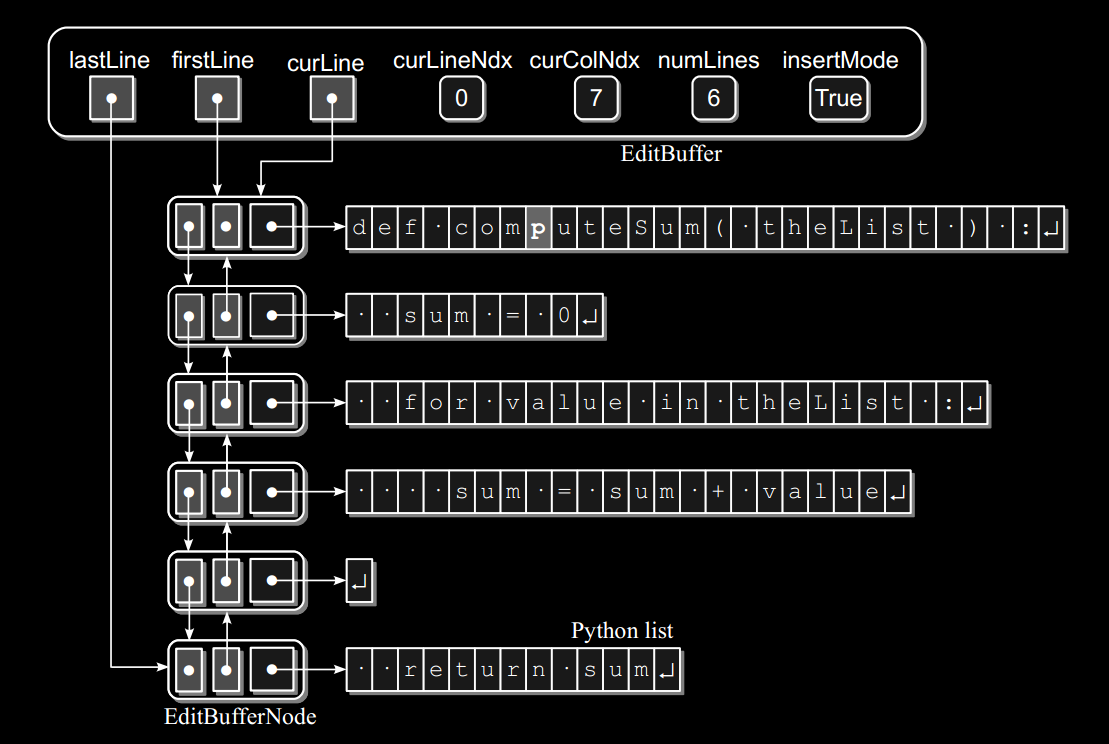

8- Implement the sparse matrix data structure using a doubly linked list.

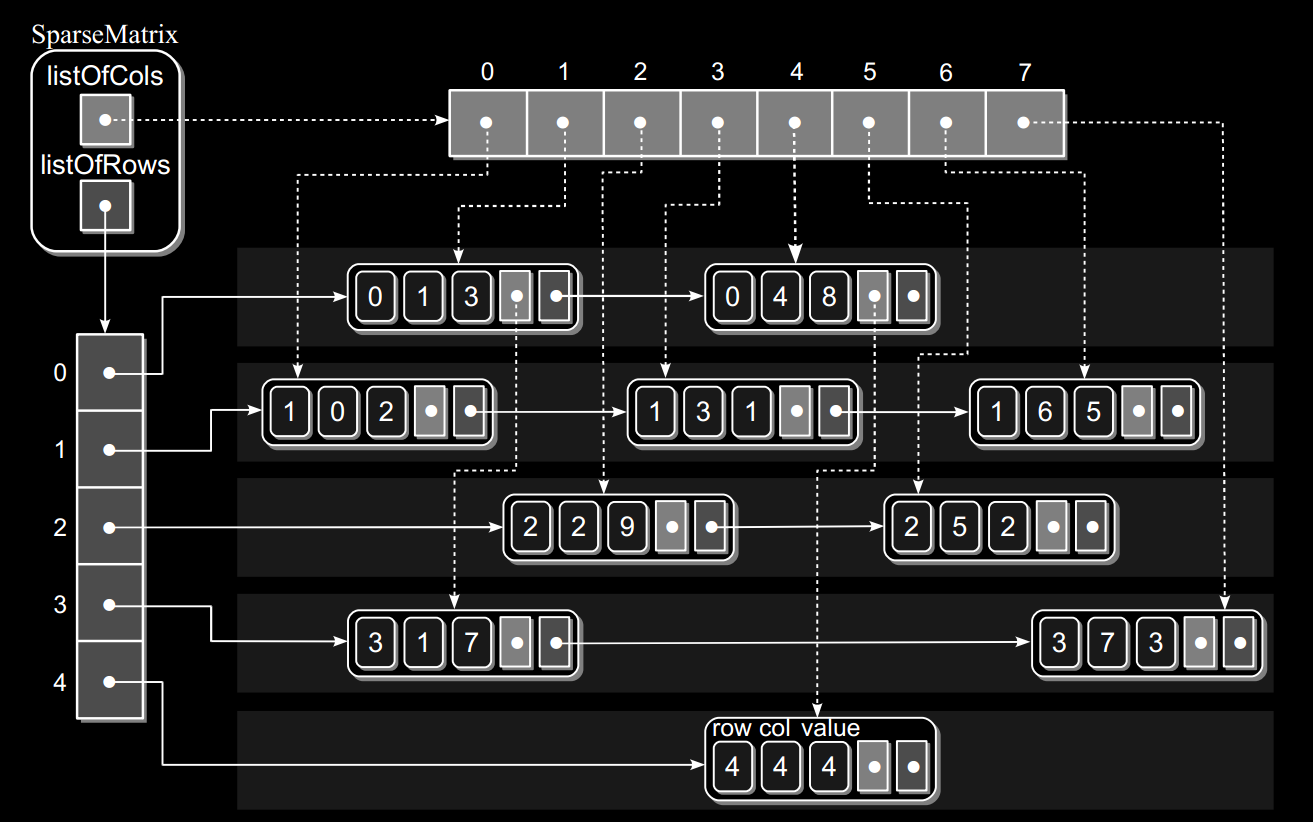

9- Write a function that takes a string representation of a polynomial and returns the corresponding polynomial object. Assume that monomials are written like "23.4*x^5". (Note that in the string the monomials may not be sorted by degree and there may be monomials of the same degree.)

10- Implement a determinant function for sparse matrices implemented as an array of linked lists. Your code should not make any new linked lists. Test your code using a 3x3 matrix. Hint: you can expand the determinant along the first column of the matrix.

11-  
a) For the sparse matrices implemented as an array of linked lists, what is the worst case for the index lookup (i.e. `__getitem__` and `__setitem__`)?  
b) Compute the number of operations for `__getitem__` in the worst case, in terms of $k$: the number of nonzero elements and $n$: the number of columns in te matrix.  
c) Using b) show that in this implementation index lookup is $O(n)$ in the worst case.

12- Show that for sparse matrices imlemented as an array of linked lists, addition is $O(kn)$ in the worst case. 

13- Implement the multiplication operation for polynomials.
